Create a neural network that can convert Celsius to Fahrenheit and examine the weights.
- Using `TensorFlow` and `Keras` build a single layered network with a single input and a single output and a single neuron.
- Using `NumPy` generate ~20 input/output values to test
- Train the neural network on your data.
- Test the neural network to see if it is working.
- Examine the weights to see if they match $F = C \times 1.8 + 32$.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

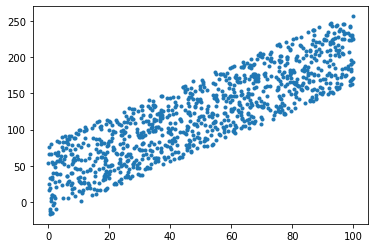

In [2]:
# generate 1000 random numbers representing degrees in celcium between 0 and 100
train_data = np.random.random(1000) * 100
noise = (np.random.random(1000) - 0.5) * 100
# generate corresponging Fehrenheit values
train_targets = train_data*1.8 + 32 + noise
plt.plot(train_data, train_targets, '.')

In [3]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(1))
network.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')


In [4]:
history = network.fit(train_data, train_targets, epochs=50, verbose=False)

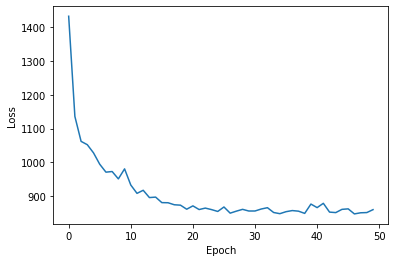

In [5]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

In [6]:
print('5 * 1.8 + 32 = 41')
print(network.predict([5]))
print('99 * 1.8 + 32 = 210.2')
print(network.predict([99]))

5 * 1.8 + 32 = 41
[[41.312725]]
99 * 1.8 + 32 = 210.2
[[206.40918]]


In [7]:
print("This is the weight that should be pretty close to the *1.8 in the formula: {}".format( network.layers[0].get_weights()[0][0] ))
print("This is the bias that should be pretty close to the +32 in the formula: {}".format( network.layers[0].get_weights()[1] ))


This is the weight that should be pretty close to the *1.8 in the formula: [1.7563453]
This is the bias that should be pretty close to the +32 in the formula: [32.531]
